In [73]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun gothic')
plt.rc('axes', unicode_minus=False)

In [74]:
import pandas as pd
df = pd.read_csv('data/score.csv')
df['학년'] = [3,3,2,1,1,3,2,2]
group = df.groupby('SW특기').size()
group

SW특기
C#            2
Java          3
Javascript    1
Python        2
dtype: int64

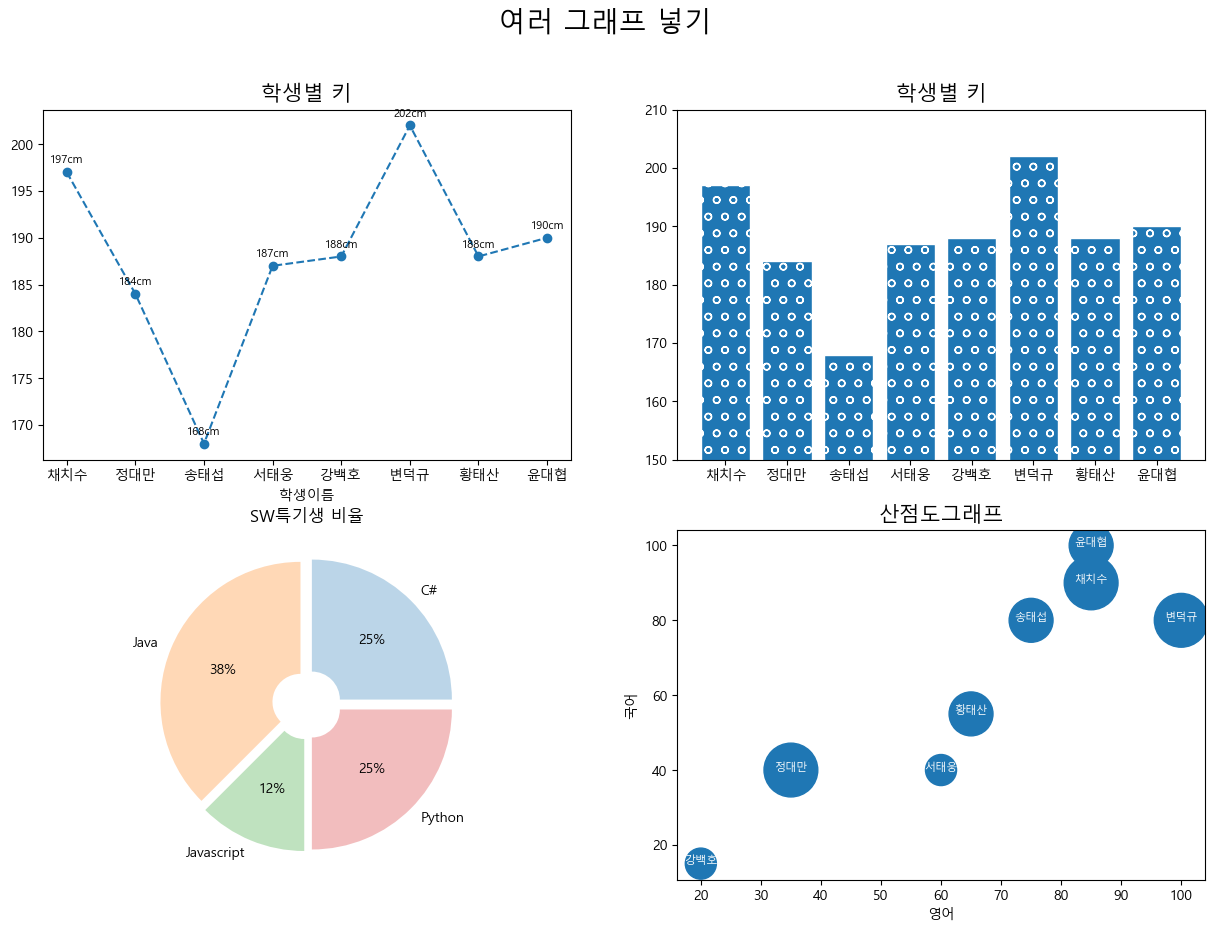

In [75]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('여러 그래프 넣기', size=20)
#첫번째 그래프
axs1 = axs[0, 0]
axs1.plot(df['이름'], df['키'], marker='o', ls='--')
axs1.set_title('학생별 키', size=15)
axs1.set_xlabel('학생이름')
for idx in range(len(df)):
    x = idx
    y = df.loc[idx, '키']
    text = f'{y}cm'
    axs1.text(x, y+1, text, size=8, ha='center')

#두번째 그래프
axs2 = axs[0, 1]
axs2.set_title('학생별 키', size=15)
axs2.bar(df['이름'], df['키'], hatch='o', ec='w')
axs2.set_ylim(150, 210)

#세번째 그래프
axs3 = axs[1, 0]
axs3.set_title('SW특기생 비율')
group = df.groupby('SW특기').size()
axs3.pie(group.values, labels=group.index, autopct='%.0f%%', 
         wedgeprops={'width':0.8, 'alpha':0.3},
         explode=[0.05]*len(group))


#네번째 그래프
axs4 = axs[1,1]
axs4.set_title('산점도그래프', size=15)
axs4.scatter(df['영어'], df['국어'], sizes = df['학년'] * 500)
axs4.set_xlabel('영어')
axs4.set_ylabel('국어')
for idx in range(len(df)):
    y = df.loc[idx, '국어']
    x = df.loc[idx, '영어']
    text = df.loc[idx, '이름']
    axs4.text(x, y, text, ha='center', size=8, color='w')

plt.show()

In [76]:
df = pd.read_csv('data/score.csv')
df['평균'] = df.loc[:, '국어':'사회'].mean(axis=1)
df


,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
0,1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
1,2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript,76.0
3,4번,서태웅,북산고,187,40,60,70,75,80,Java,65.0
4,5번,강백호,북산고,188,15,20,10,35,10,Java,18.0
5,6번,변덕규,능남고,202,80,100,95,85,80,C#,88.0
6,7번,황태산,능남고,188,55,65,45,40,35,Python,48.0
7,8번,윤대협,능남고,190,100,85,90,95,95,C#,93.0


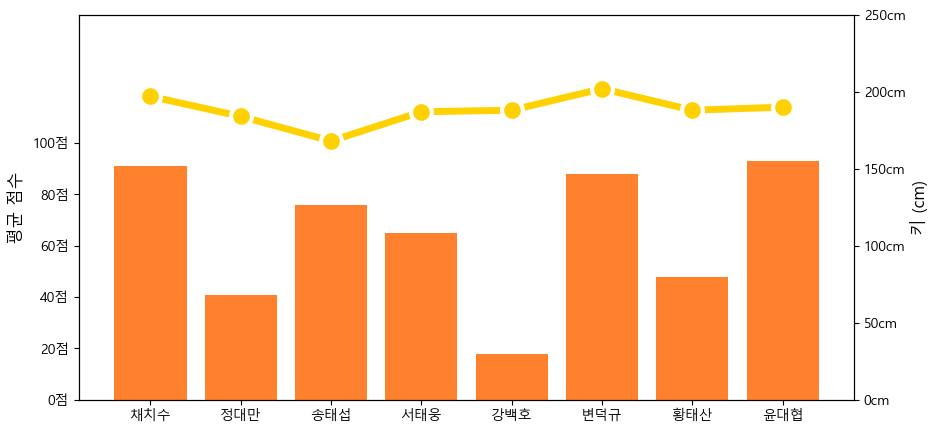

In [77]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df['이름'], df['평균'], color='#ff812d')
ax.set_ylim(0, 150)
yticks_left = [y for y in range(0, 101, 20)]
ytick_labels_left = [f'{y}점' for y in yticks_left]
ax.set_yticks(yticks_left)
ax.set_yticklabels(ytick_labels_left)
ax.set_ylabel('평균 점수', fontsize=12)



ax2 = ax.twinx()
ax2.plot(df['이름'], df['키'], color='#ffd100', marker='o', ms=15, lw=5, mec='w', mew=3)
ax2.set_ylim(0, 250)
yticks_right = [y for y in range(0, 251, 50)]
ytick_labels_right = [f'{y}cm' for y in yticks_right]
ax2.set_yticks(yticks_right)
ax2.set_yticklabels(ytick_labels_right)
ax2.set_ylabel('키 (cm)', fontsize=12)

plt.show()



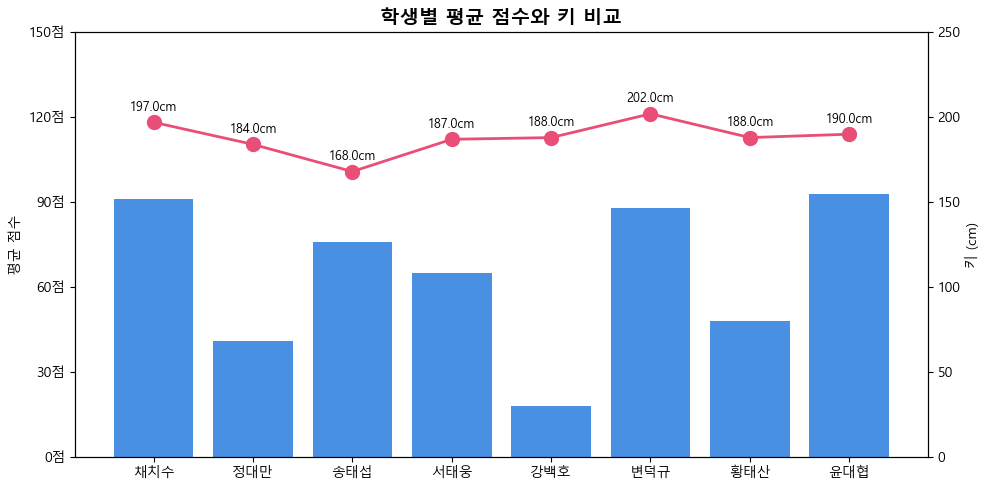

In [78]:

fig, ax = plt.subplots(figsize=(10, 5))

# 평균 점수 막대 그래프
ax.bar(df['이름'], df['평균'], color='#4a90e2')
ax.set_ylim(0, 150)
ax.set_ylabel('평균 점수')

# 왼쪽 y축 눈금에 '점' 단위 붙이기
yticks_left = [y for y in range(0, 151, 30)]
ytick_labels_left = [f'{y}점' for y in yticks_left]
ax.set_yticks(yticks_left)
ax.set_yticklabels(ytick_labels_left)

# 오른쪽 y축: 키 선 그래프
ax2 = ax.twinx()
ax2.plot(df['이름'], df['키'], color='#e94e77', marker='o', linewidth=2, markersize=10)
ax2.set_ylim(0, 250)
ax2.set_ylabel('키 (cm)')

# 키 값 마커 위에 표시
for idx, y in enumerate(df['키']):
    ax2.text(idx, y + 5, f'{y:.1f}cm', ha='center', va='bottom', fontsize=9)

# 제목 및 레이아웃
plt.title('학생별 평균 점수와 키 비교', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


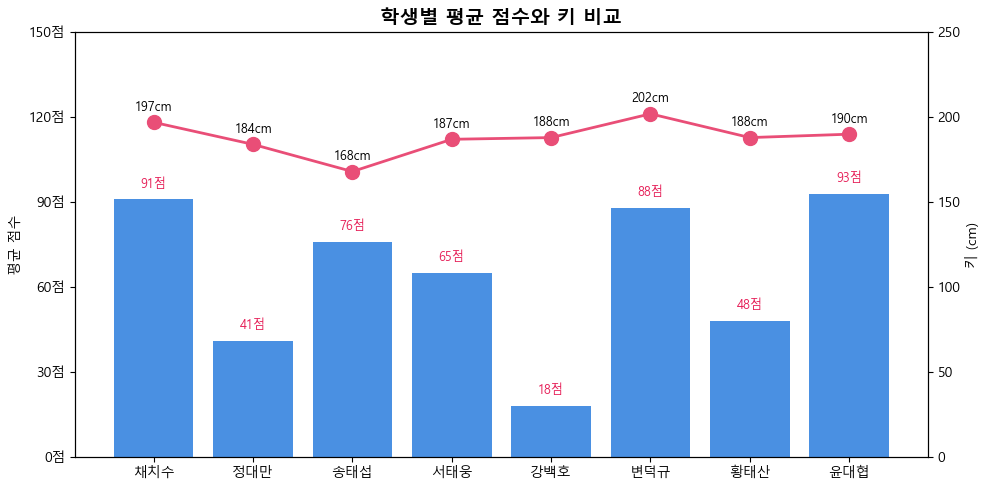

In [79]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# 평균 점수 막대 그래프
bars = ax.bar(df['이름'], df['평균'], color='#4a90e2')
ax.set_ylim(0, 150)
ax.set_ylabel('평균 점수')

# 왼쪽 y축 눈금 설정: 값과 라벨 모두 지정
yticks_left = [y for y in range(0, 151, 30)]
ytick_labels_left = [f'{y}점' for y in yticks_left]
ax.set_yticks(yticks_left)
ax.set_yticklabels(ytick_labels_left)

# 막대 위에 평균 점수 표시
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 3, f'{int(height)}점',
            ha='center', va='bottom', fontsize=9, color="#E61E57")

# 오른쪽 y축: 키 선 그래프
ax2 = ax.twinx()
ax2.plot(df['이름'], df['키'], color='#e94e77', marker='o', linewidth=2, markersize=10)
ax2.set_ylim(0, 250)
ax2.set_ylabel('키 (cm)')

# 키 값 마커 위에 표시
for idx, y in enumerate(df['키']):
    ax2.text(idx, y + 5, f'{int(y)}cm', ha='center', va='bottom', fontsize=9)

# 제목 및 레이아웃
plt.title('학생별 평균 점수와 키 비교', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('data/평균점수와 키 비교.png')
plt.show()

